In [610]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import koreanize_matplotlib

In [611]:
df = pd.read_csv('./ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [612]:
df.isna().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Mean: 90.7694783445693
Median: 89.9454695
Standard Deviation: 21.39700579694361
Number of outliers: 3


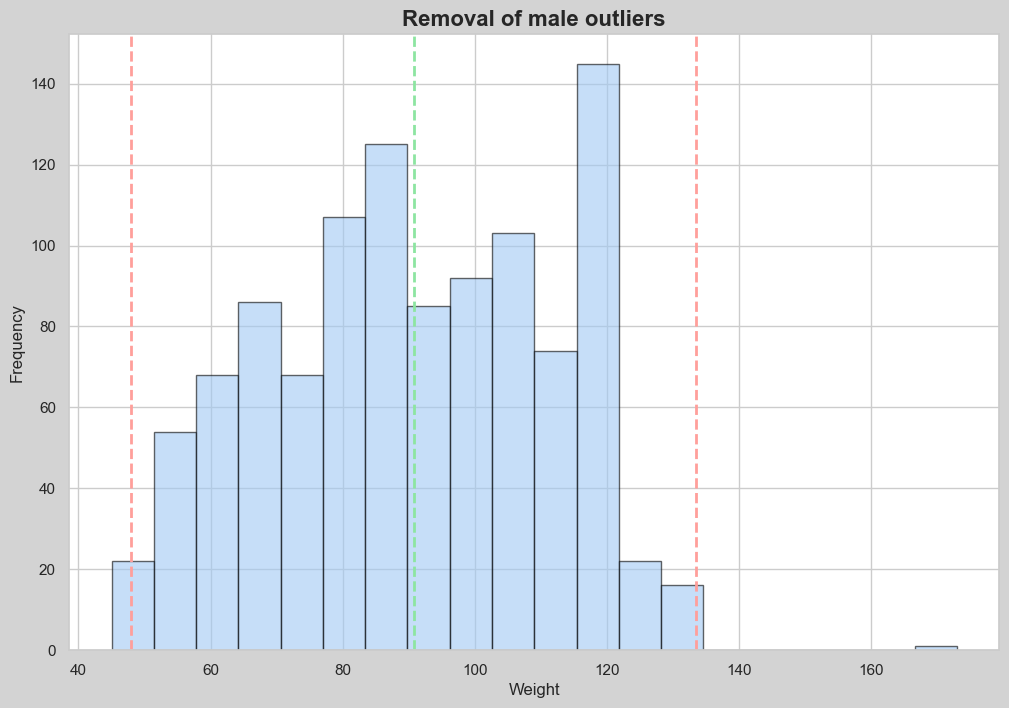

In [613]:
manWeight = df[df['Gender'] == 'Male']['Weight']

mean = np.mean(manWeight)
median = np.median(manWeight)
std_dev = np.std(manWeight)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)


# 이상치 기준 정의 (예: 평균 ± 2 표준편차)
lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

# 이상치 여부 확인
outliers = (manWeight < lower_bound) | (manWeight > upper_bound)

# 결과 출력
print("Number of outliers:", np.sum(outliers))
plt.figure(figsize=(12,8))
# 데이터와 이상치 시각화
plt.hist(manWeight, bins=20, alpha=0.6, color='b', edgecolor='black')
plt.axvline(mean, color='g', linestyle='dashed', linewidth=2)
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=2)
plt.title("Removal of male outliers", fontsize=16, fontweight='bold')
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.gcf().patch.set_facecolor('lightgrey')
plt.show()
df = df.drop(index=manWeight[outliers].index)

Mean: 82.30236417353788
Median: 78.0
Standard Deviation: 29.70965113583035
Number of outliers: 30


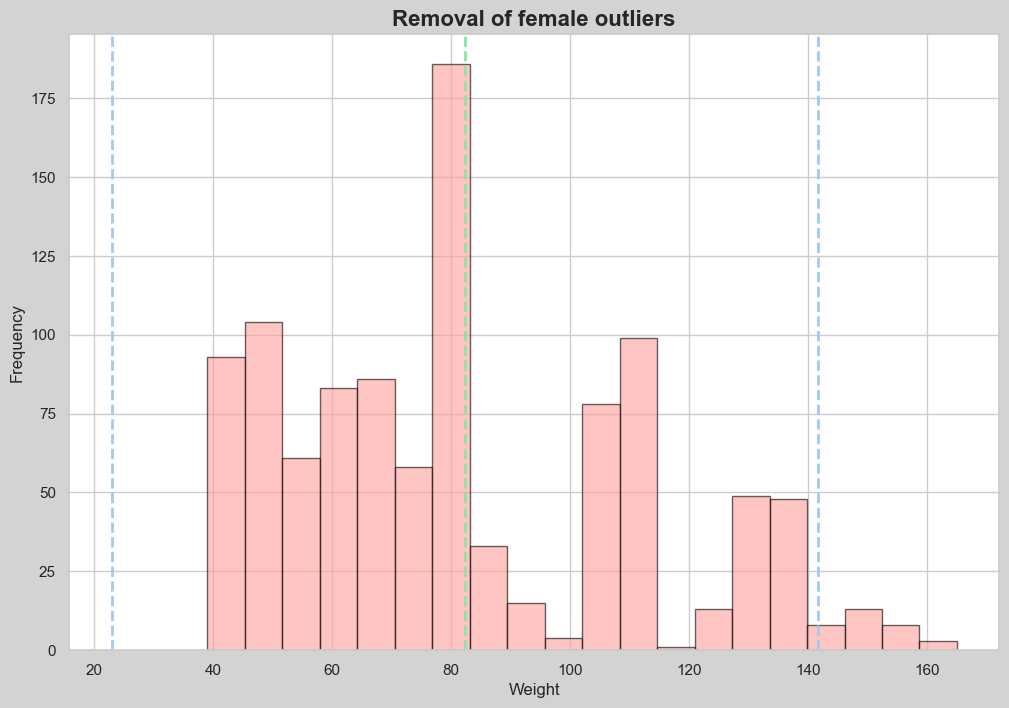

In [614]:
womanWeight = df[df['Gender'] == 'Female']['Weight']

mean = np.mean(womanWeight)
median = np.median(womanWeight)
std_dev = np.std(womanWeight)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)


# 이상치 기준 정의 (예: 평균 ± 2 표준편차)
lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

# 이상치 여부 확인
outliers = (womanWeight < lower_bound) | (womanWeight > upper_bound)

# 결과 출력
print("Number of outliers:", np.sum(outliers))
plt.figure(figsize=(12,8))
# 데이터와 이상치 시각화
plt.hist(womanWeight, bins=20, alpha=0.6, color='r', edgecolor='black')
plt.axvline(mean, color='g', linestyle='dashed', linewidth=2)
plt.axvline(lower_bound, color='b', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='b', linestyle='dashed', linewidth=2)
plt.title("Removal of female outliers", fontsize=16, fontweight='bold')
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.gcf().patch.set_facecolor('lightgrey')
plt.show()
# df = df.drop(index=womanWeight[outliers].index)

In [615]:
healthDF=df.drop(index=df[df.duplicated()].index)
healthDF=healthDF[healthDF.columns[[0,1,2,3,-1]]]
healthDF.head()

,Gender,Age,Height,Weight,NObeyesdad
0,Female,21.0,1.62,64.0,Normal_Weight
1,Female,21.0,1.52,56.0,Normal_Weight
2,Male,23.0,1.80,77.0,Normal_Weight
3,Male,27.0,1.80,87.0,Overweight_Level_I
4,Male,22.0,1.78,89.8,Overweight_Level_II


In [616]:
healthDF.loc[~healthDF['NObeyesdad'].str.contains('Obesity_Type'),'IFbeyesdad'] = False
healthDF.loc[healthDF['NObeyesdad'].str.contains('Obesity_Type'),'IFbeyesdad'] = True
healthDF['IFbeyesdad'] = healthDF['IFbeyesdad'].astype('bool')
healthDF['Age'] = healthDF['Age'].astype('int16')
healthDF.head(15)

,Gender,Age,Height,Weight,NObeyesdad,IFbeyesdad
0,Female,21,1.62,64.0,Normal_Weight,False
1,Female,21,1.52,56.0,Normal_Weight,False
2,Male,23,1.80,77.0,Normal_Weight,False
3,Male,27,1.80,87.0,Overweight_Level_I,False
4,Male,22,1.78,89.8,Overweight_Level_II,False
5,Male,29,1.62,53.0,Normal_Weight,False
6,Female,23,1.50,55.0,Normal_Weight,False
7,Male,22,1.64,53.0,Normal_Weight,False
8,Male,24,1.78,64.0,Normal_Weight,False
9,Male,22,1.72,68.0,Normal_Weight,False


Mean: 108.19783207068606
Standard Deviation: 22.050995971854533
Number of outliers: 14


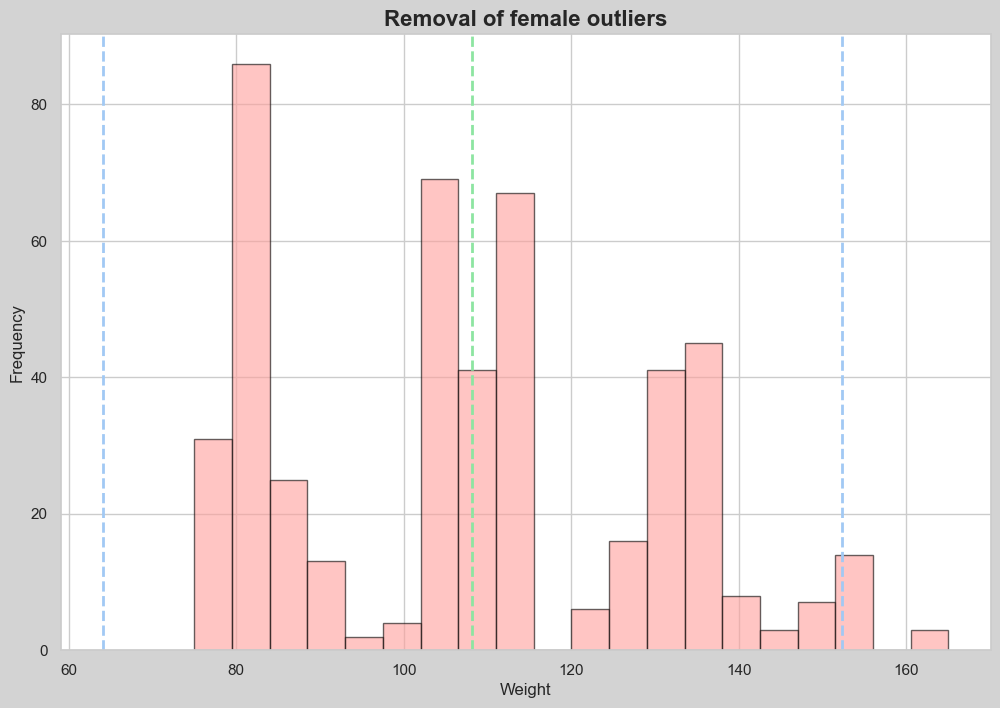

In [617]:
womanWeight = healthDF[(healthDF['Gender'] == 'Female') & healthDF['IFbeyesdad']]['Weight']

mean = np.mean(womanWeight)
std_dev = np.std(womanWeight)

print("Mean:", mean)
print("Standard Deviation:", std_dev)


# 이상치 기준 정의 (예: 평균 ± 2 표준편차)
lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

# 이상치 여부 확인
outliers = (womanWeight < lower_bound) | (womanWeight > upper_bound)

# 결과 출력
print("Number of outliers:", np.sum(outliers))
plt.figure(figsize=(12,8))
# 데이터와 이상치 시각화
plt.hist(womanWeight, bins=20, alpha=0.6, color='r', edgecolor='black')
plt.axvline(mean, color='g', linestyle='dashed', linewidth=2)
plt.axvline(lower_bound, color='b', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='b', linestyle='dashed', linewidth=2)
plt.title("Removal of female outliers", fontsize=16, fontweight='bold')
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.gcf().patch.set_facecolor('lightgrey')
plt.show()
# healthDF = healthDF.drop(index=womanWeight[outliers].index)

In [645]:
healthDF['BMI'] = healthDF['Weight']/(healthDF['Height'] * healthDF['Height'])
healthDF.corr(numeric_only=True)

,Age,Height,Weight,IFbeyesdad,BMI
Age,1.000000,-0.034854,0.187128,0.201102,0.229618
Height,-0.034854,1.000000,0.457187,0.128452,0.123362
Weight,0.187128,0.457187,1.000000,0.792899,0.934276
IFbeyesdad,0.201102,0.128452,0.792899,1.000000,0.837473
BMI,0.229618,0.123362,0.934276,0.837473,1.000000


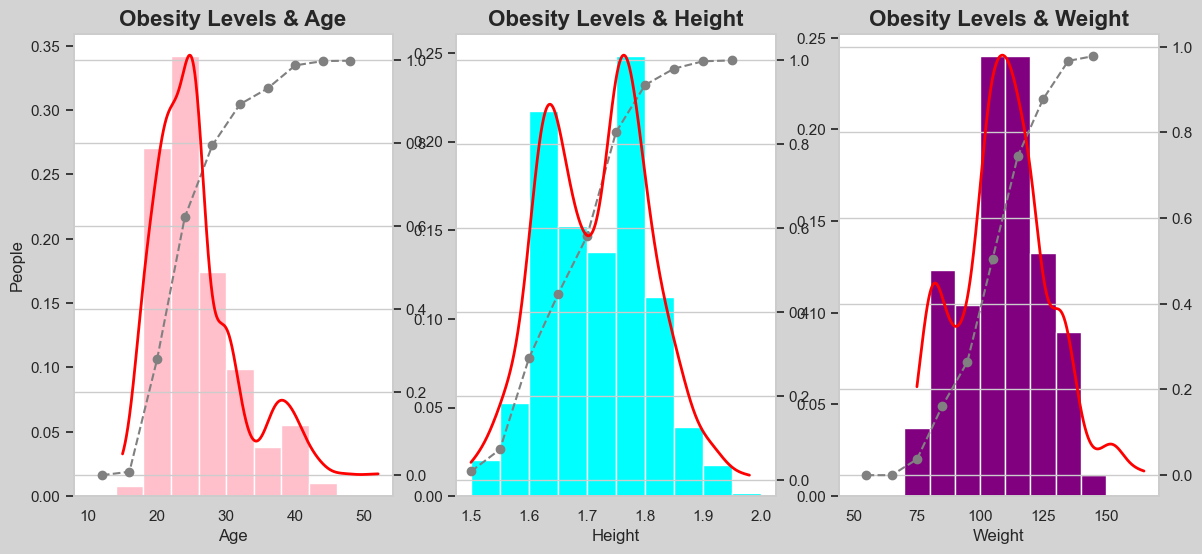

In [650]:
# Distribution of different type of amount
fig , ax = plt.subplots(1,3,figsize = (14,6))
data_list = []
data_list.append(healthDF[healthDF['IFbeyesdad']].Age.values)
data_list.append(healthDF[healthDF['IFbeyesdad']].Height.values)
data_list.append(healthDF[healthDF['IFbeyesdad']].Weight.values)
titles = ['Age','Height','Weight']
colors = ['pink','cyan','purple']
ranges = [(10,50),(1.5,2.0),(50,150)]
nums = [4,0.05,10]
keys = [1,0,1]
gob = [11.5,0.22,38]

for idx, a in enumerate(ax):
    selct_SR = data_list[idx]
    weights = np.ones_like(selct_SR) / len(selct_SR)
    rel_freq, _, _ = a.hist(selct_SR, color = colors[idx], bins=10, range=ranges[idx],weights = weights)
    ax2 = a.twinx()
    cum_rel_freq = np.cumsum(rel_freq)
    if keys[idx]:
        class_value = [(i+(i+nums[idx]))//2 for i in range(ranges[idx][0],ranges[idx][1],nums[idx])]
    else:
        fk = int(ranges[idx][0]*10)
        lk = int(ranges[idx][1]*10)
        class_value = [round((i+(i+nums[idx])-nums[idx])/2,2) for i in np.arange(ranges[idx][0],ranges[idx][1],nums[idx])]
    ax2.plot(class_value, cum_rel_freq, ls='--', marker='o',color='gray')
    kde = gaussian_kde(selct_SR, bw_method='scott')  # bw_method: 커널 대역폭 방법
    x = np.linspace(min(selct_SR), max(selct_SR),1000)
    plt.plot(x, kde(x) * gob[idx], color='red', linewidth=2)
    a.set_title(f'Obesity Levels & {titles[idx]}', fontsize=16, fontweight='bold')
    a.set_xlabel(titles[idx])
    a.grid()
ax[0].set_ylabel('People', fontsize=12)
plt.gcf().patch.set_facecolor('lightgrey')
plt.show()


In [620]:
healthDF2 = healthDF.copy()
healthDF2['Age'] = pd.cut(healthDF2['Age'], bins=list(range(0,101,10)), labels=[f'{i}~{i+10}' for i in range(0,91,10)])
healthDF2

,Gender,Age,Height,Weight,NObeyesdad,IFbeyesdad,BMI
0,Female,20~30,1.620000,64.000000,Normal_Weight,False,24.386526
1,Female,20~30,1.520000,56.000000,Normal_Weight,False,24.238227
2,Male,20~30,1.800000,77.000000,Normal_Weight,False,23.765432
3,Male,20~30,1.800000,87.000000,Overweight_Level_I,False,26.851852
4,Male,20~30,1.780000,89.800000,Overweight_Level_II,False,28.342381
...,...,...,...,...,...,...,...
2106,Female,10~20,1.710730,131.408528,Obesity_Type_III,True,44.901475
2107,Female,20~30,1.748584,133.742943,Obesity_Type_III,True,43.741923
2108,Female,20~30,1.752206,133.689352,Obesity_Type_III,True,43.543817
2109,Female,20~30,1.739450,133.346641,Obesity_Type_III,True,44.071535


In [632]:
agebey_DF = healthDF2.groupby(['Age','Gender'])['IFbeyesdad'].count()
agebey_DF2 = agebey_DF.copy()
agebey_true_DF = healthDF2[healthDF2['IFbeyesdad'] == True].groupby(['Age','Gender'])['IFbeyesdad'].count()
agebey_DF = round((agebey_true_DF / agebey_DF) * 100 ,2)
agebey_DF.dropna(inplace=True)
agebey_DF.drop(index=agebey_DF.index[-1],inplace=True)

C:\Users\KDP-38\AppData\Local\Temp\ipykernel_12332\2839366853.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agebey_DF = healthDF2.groupby(['Age','Gender'])['IFbeyesdad'].count()
C:\Users\KDP-38\AppData\Local\Temp\ipykernel_12332\2839366853.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agebey_true_DF = healthDF2[healthDF2['IFbeyesdad'] == True].groupby(['Age','Gender'])['IFbeyesdad'].count()


In [623]:
agebey_DF = agebey_DF.reset_index()
agebey_DF
agebey_DF[agebey_DF['Gender'] == 'Female']['IFbeyesdad']


0    30.25
2    59.47
4    36.21
6    61.90
8    50.00
Name: IFbeyesdad, dtype: float64

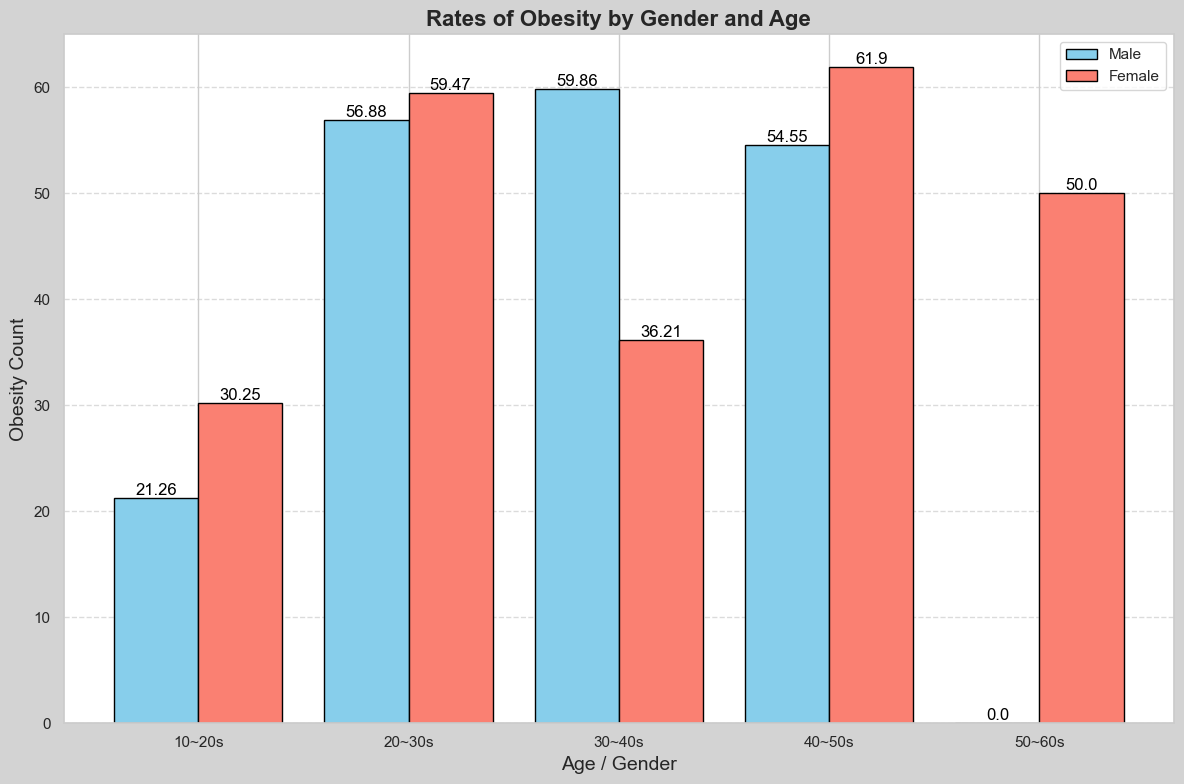

(['10~20s', '20~30s', '30~40s', '40~50s', '50~60s'],
 1    21.26
 3    56.88
 5    59.86
 7    54.55
 9     0.00
 Name: IFbeyesdad, dtype: float64,
 0    30.25
 2    59.47
 4    36.21
 6    61.90
 8    50.00
 Name: IFbeyesdad, dtype: float64)

In [624]:
categories = agebey_DF[agebey_DF['Gender']=='Male']['Age'].to_list()
values1 = agebey_DF[agebey_DF['Gender'] == 'Male']['IFbeyesdad']  # 첫 번째 카테고리 값
values2 = agebey_DF[agebey_DF['Gender'] == 'Female']['IFbeyesdad']  # 두 번째 카테고리 값
categories = [cate + 's' for cate in categories]
# 막대 위치 설정
x = np.arange(len(categories)) / 2
width = 0.2  # 막대의 너비

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, values1, width, label='Male', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, values2, width, label='Female', color='salmon', edgecolor='black')

# 제목 및 레이블 설정
ax.set_title('Rates of Obesity by Gender and Age', fontsize=16, fontweight='bold')
ax.set_xlabel('Age / Gender', fontsize=14)
ax.set_ylabel('Obesity Count', fontsize=14)

# x축 레이블
ax.set_xticks(x)
ax.set_xticklabels(categories)

# 값 레이블 추가
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12, color='black')
for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12, color='black')

# 범례 추가
ax.legend()

# 그리드 추가
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# 배경색 설정
fig.patch.set_facecolor('lightgrey')

# 그래프 표시
plt.tight_layout()
plt.show()
categories,values1,values2

In [625]:
heightweight = healthDF.groupby(['Gender','Age'])['Weight'].mean()
heightweight

Gender  Age
Female  15     86.000000
        16     59.557093
        17     57.195409
        18     80.079703
        19     66.336224
                 ...    
Male    46     88.600878
        47     84.729197
        50     82.130728
        55     81.176972
        56     90.000000
Name: Weight, Length: 68, dtype: float64

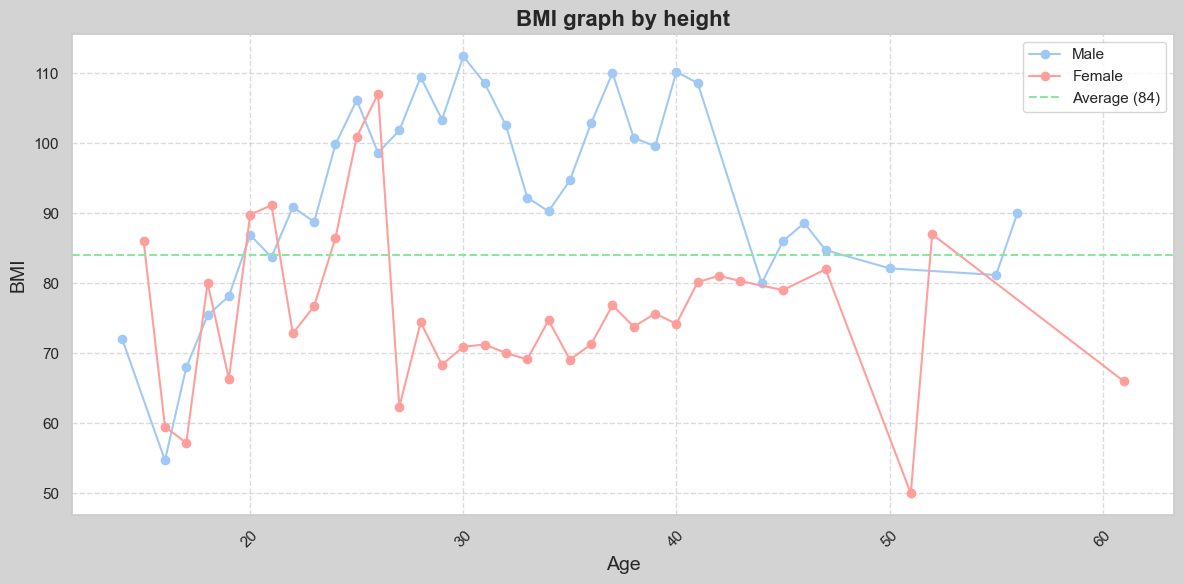

In [626]:
categories = range(int(df['Age'].min()),int(df['Age'].max())+1)
values1 = heightweight.loc['Male'] # 첫 번째 카테고리 값
values2 = heightweight.loc['Female']  # 두 번째 카테고리 값
mean_value = round((values1.mean() + values2.mean()) / 2)
# 선 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(values1, marker='o', linestyle='-', color='b', label='Male')
plt.plot(values2, marker='o', linestyle='-', color='r', label='Female')

plt.axhline(y=mean_value, color='g', linestyle='--', label=f'Average ({mean_value})')

# 제목 및 레이블 설정
plt.title('BMI graph by height', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('BMI', fontsize=14)

# x축 레이블 회전
plt.xticks(rotation=45)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 범례 추가
plt.legend()

# 배경색 설정
plt.gcf().patch.set_facecolor('lightgrey')

# 그래프 표시
plt.tight_layout()
plt.show()

In [627]:
ageweight = df.groupby(['Gender','Age'])['Weight'].mean()
ageweight

Gender  Age      
Female  15.000000    86.000000
        16.000000    55.333333
        16.093234    65.000000
        16.129279    85.583485
        16.172992    65.000000
                       ...    
Male    55.000000    82.000000
        55.022494    80.400306
        55.137881    80.993213
        55.246250    80.491339
        56.000000    90.000000
Name: Weight, Length: 1428, dtype: float64

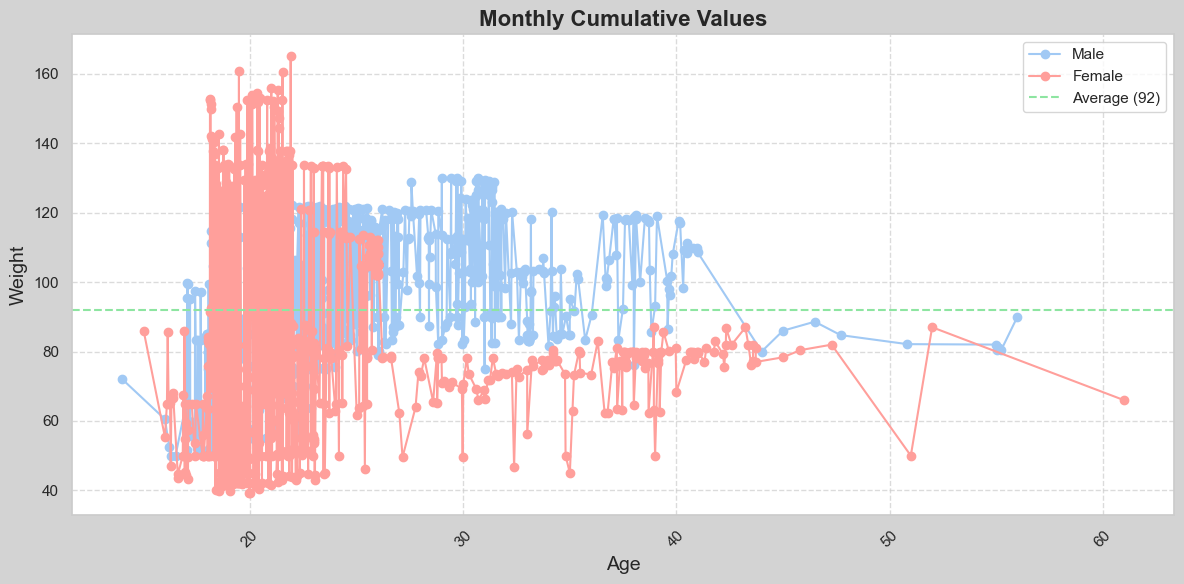

In [628]:
categories = range(int(df['Age'].min()),int(df['Age'].max())+1)
values1 = ageweight.loc['Male'] # 첫 번째 카테고리 값
values2 = ageweight.loc['Female']  # 두 번째 카테고리 값
mean_value = round((values1.mean() + values2.mean()) / 2)
# 선 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(values1, marker='o', linestyle='-', color='b', label='Male')
plt.plot(values2, marker='o', linestyle='-', color='r', label='Female')

plt.axhline(y=mean_value, color='g', linestyle='--', label=f'Average ({mean_value})')

# 제목 및 레이블 설정
plt.title('Monthly Cumulative Values', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Weight', fontsize=14)

# x축 레이블 회전
plt.xticks(rotation=45)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 범례 추가
plt.legend()

# 배경색 설정
plt.gcf().patch.set_facecolor('lightgrey')

# 그래프 표시
plt.tight_layout()
plt.show()

In [629]:
healthDF

,Gender,Age,Height,Weight,NObeyesdad,IFbeyesdad,BMI
0,Female,21,1.620000,64.000000,Normal_Weight,False,24.386526
1,Female,21,1.520000,56.000000,Normal_Weight,False,24.238227
2,Male,23,1.800000,77.000000,Normal_Weight,False,23.765432
3,Male,27,1.800000,87.000000,Overweight_Level_I,False,26.851852
4,Male,22,1.780000,89.800000,Overweight_Level_II,False,28.342381
...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,Obesity_Type_III,True,44.901475
2107,Female,21,1.748584,133.742943,Obesity_Type_III,True,43.741923
2108,Female,22,1.752206,133.689352,Obesity_Type_III,True,43.543817
2109,Female,24,1.739450,133.346641,Obesity_Type_III,True,44.071535


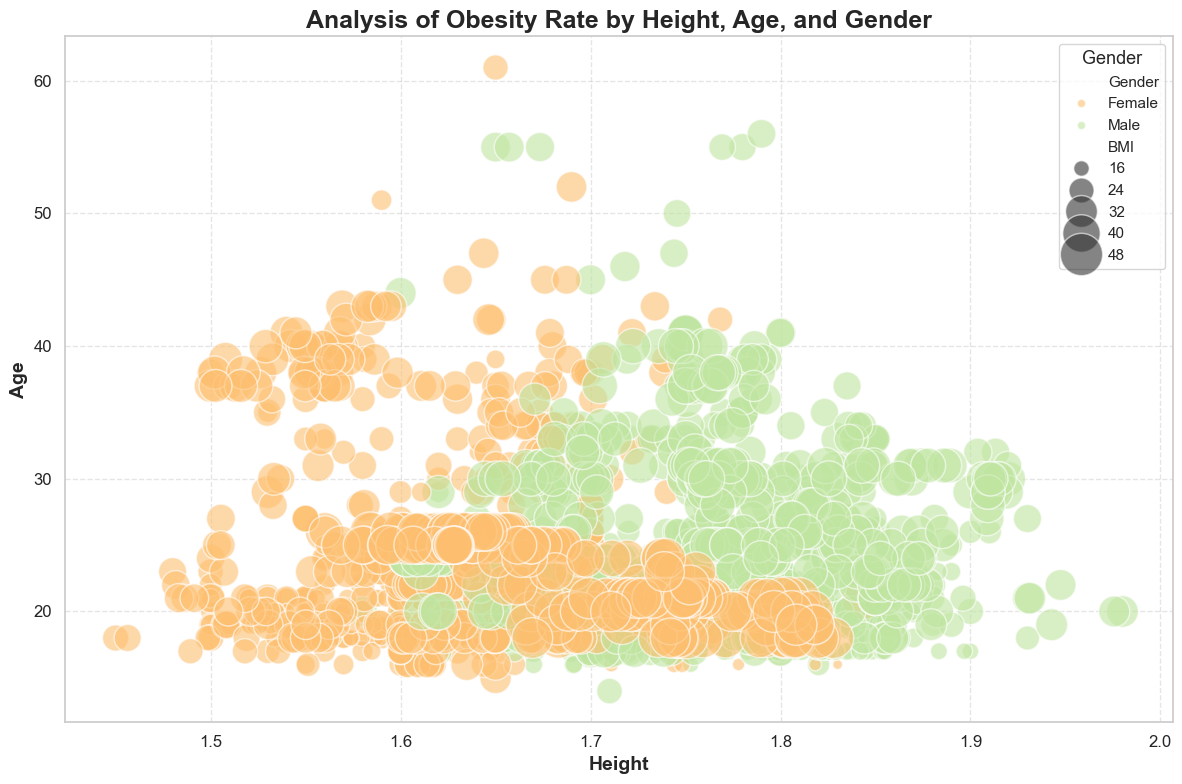

In [630]:
# 산점도 그래프 그리기
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Height', y='Age', hue='Gender', size='BMI', data=healthDF, 
                          sizes=(50, 1000), palette='Spectral', alpha=0.6, edgecolor='w')

# 그래프 꾸미기
plt.title('Analysis of Obesity Rate by Height, Age, and Gender', fontsize=18, fontweight='bold')
plt.xlabel('Height', fontsize=14, fontweight='bold')
plt.ylabel('Age', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 범례 조정
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, labels, title='Gender', title_fontsize='13', fontsize='11', loc='upper right')

plt.tight_layout()
plt.show()

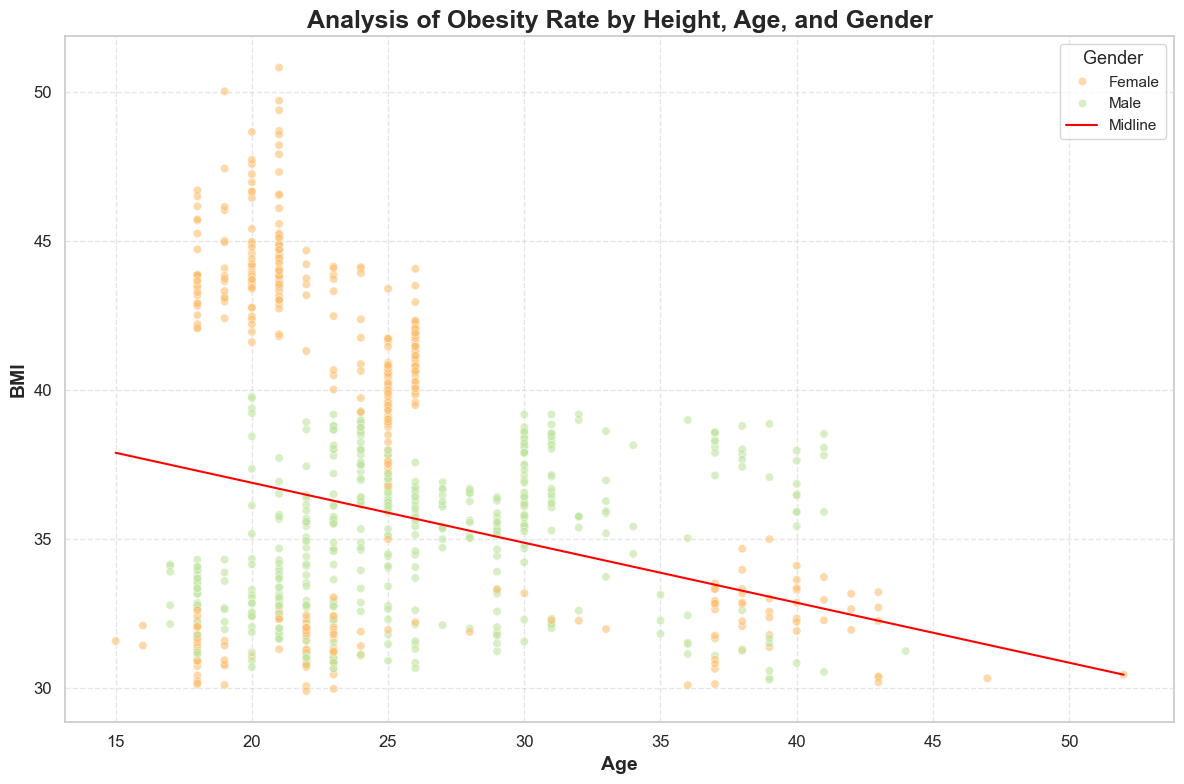

In [655]:
x = healthDF[healthDF['IFbeyesdad']]['Age']
y = healthDF[healthDF['IFbeyesdad']].groupby('Age')['BMI'].mean()
# 산점도 그래프 그리기
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Age', y='BMI', hue='Gender', data=healthDF[healthDF['IFbeyesdad']].sort_index(ascending=False), 
                        palette='Spectral', alpha=0.6, edgecolor='w')

# 그래프 꾸미기
plt.title('Analysis of Obesity Rate by Height, Age, and Gender', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('BMI', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot([min(x), max(x)], [y.iloc[10], y.iloc[-1]], color='red', label='Midline')
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, labels, title='Gender', title_fontsize='13', fontsize='11', loc='upper right')

plt.tight_layout()
plt.show()

C:\Users\KDP-38\AppData\Local\Temp\ipykernel_12332\1092128455.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter = sns.scatterplot(x='Height', y='BMI', data=dataDF,


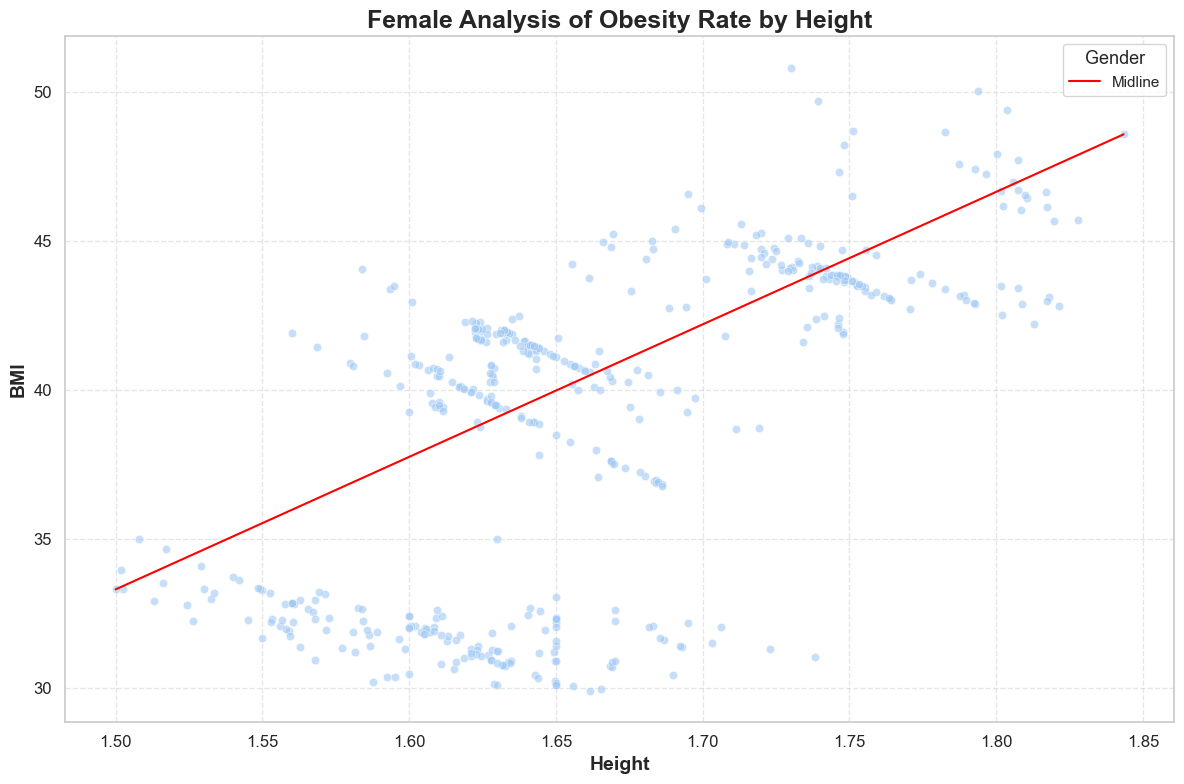

In [642]:
dataDF = healthDF[healthDF['IFbeyesdad'] & (healthDF['Gender'] == 'Female') ].sort_index(ascending=False)
x = dataDF['Height']
y = dataDF.groupby('Height')['BMI'].mean()
# 산점도 그래프 그리기
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Height', y='BMI', data=dataDF, 
                        palette='Spectral', alpha=0.6, edgecolor='w')

# 그래프 꾸미기
plt.title('Female Analysis of Obesity Rate by Height', fontsize=18, fontweight='bold')
plt.xlabel('Height', fontsize=14, fontweight='bold')
plt.ylabel('BMI', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot([min(x), max(x)], [y.iloc[10], y.iloc[-1]], color='red', label='Midline')
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, labels, title='Gender', title_fontsize='13', fontsize='11', loc='upper right')

plt.tight_layout()
plt.show()